In [2]:
#install library in your environment
!pip install minisom

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12042 sha256=f6dc97f072ead77567cb2c991102bd86a7e87b67ebfacb883eb1067432905aaf
  Stored in directory: c:\users\surai\appdata\local\pip\cache\wheels\19\db\95\5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom


In [1]:
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
#load data from drive
#header_name = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('Pistachio_28_Features_Dataset.csv')#, names=header_name)

In [5]:
df.head()

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,...,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,...,17.7206,19.6024,21.1342,0.4581,0.6635,0.7591,2.9692,3.0576,2.9542,Kirmizi_Pistachio
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,...,26.7061,27.2112,25.1035,-0.3847,-0.2713,-0.2927,1.9807,2.1006,2.2152,Kirmizi_Pistachio
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,...,19.0129,20.0703,20.7006,-0.6014,-0.4500,0.2998,3.5420,3.6856,4.1012,Kirmizi_Pistachio
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,...,18.1773,18.7152,29.7883,-0.6943,-0.6278,-0.7798,2.8776,2.8748,2.8953,Kirmizi_Pistachio
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,...,23.4298,24.0878,23.1157,-0.9287,-0.8134,-0.4970,2.9915,2.8813,2.7362,Kirmizi_Pistachio


In [6]:
df.shape

(2148, 29)

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [9]:
X.shape, y.shape

((2148, 28), (2148,))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1503, 28), (645, 28), (1503,), (645,))

In [12]:
# Fit and transform the Train/Test data using same pre-processing object
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [13]:
type(X_test)

numpy.ndarray

In [14]:
#turn df to numpy array as SOM library accepts data without header
#X_test=X_test.values

In [22]:
# Initialize SOM, it doesn't make use of target label y
som = MiniSom(x=20, y=20, input_len=28, sigma=1.0, learning_rate=0.05)
som.random_weights_init(X_train)
som.train_random(X_train, num_iteration=1000)

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Now y_train will have values 0, 1, 2
y_test = label_encoder.fit_transform(y_test)  # Now y_train will have values 0, 1, 2

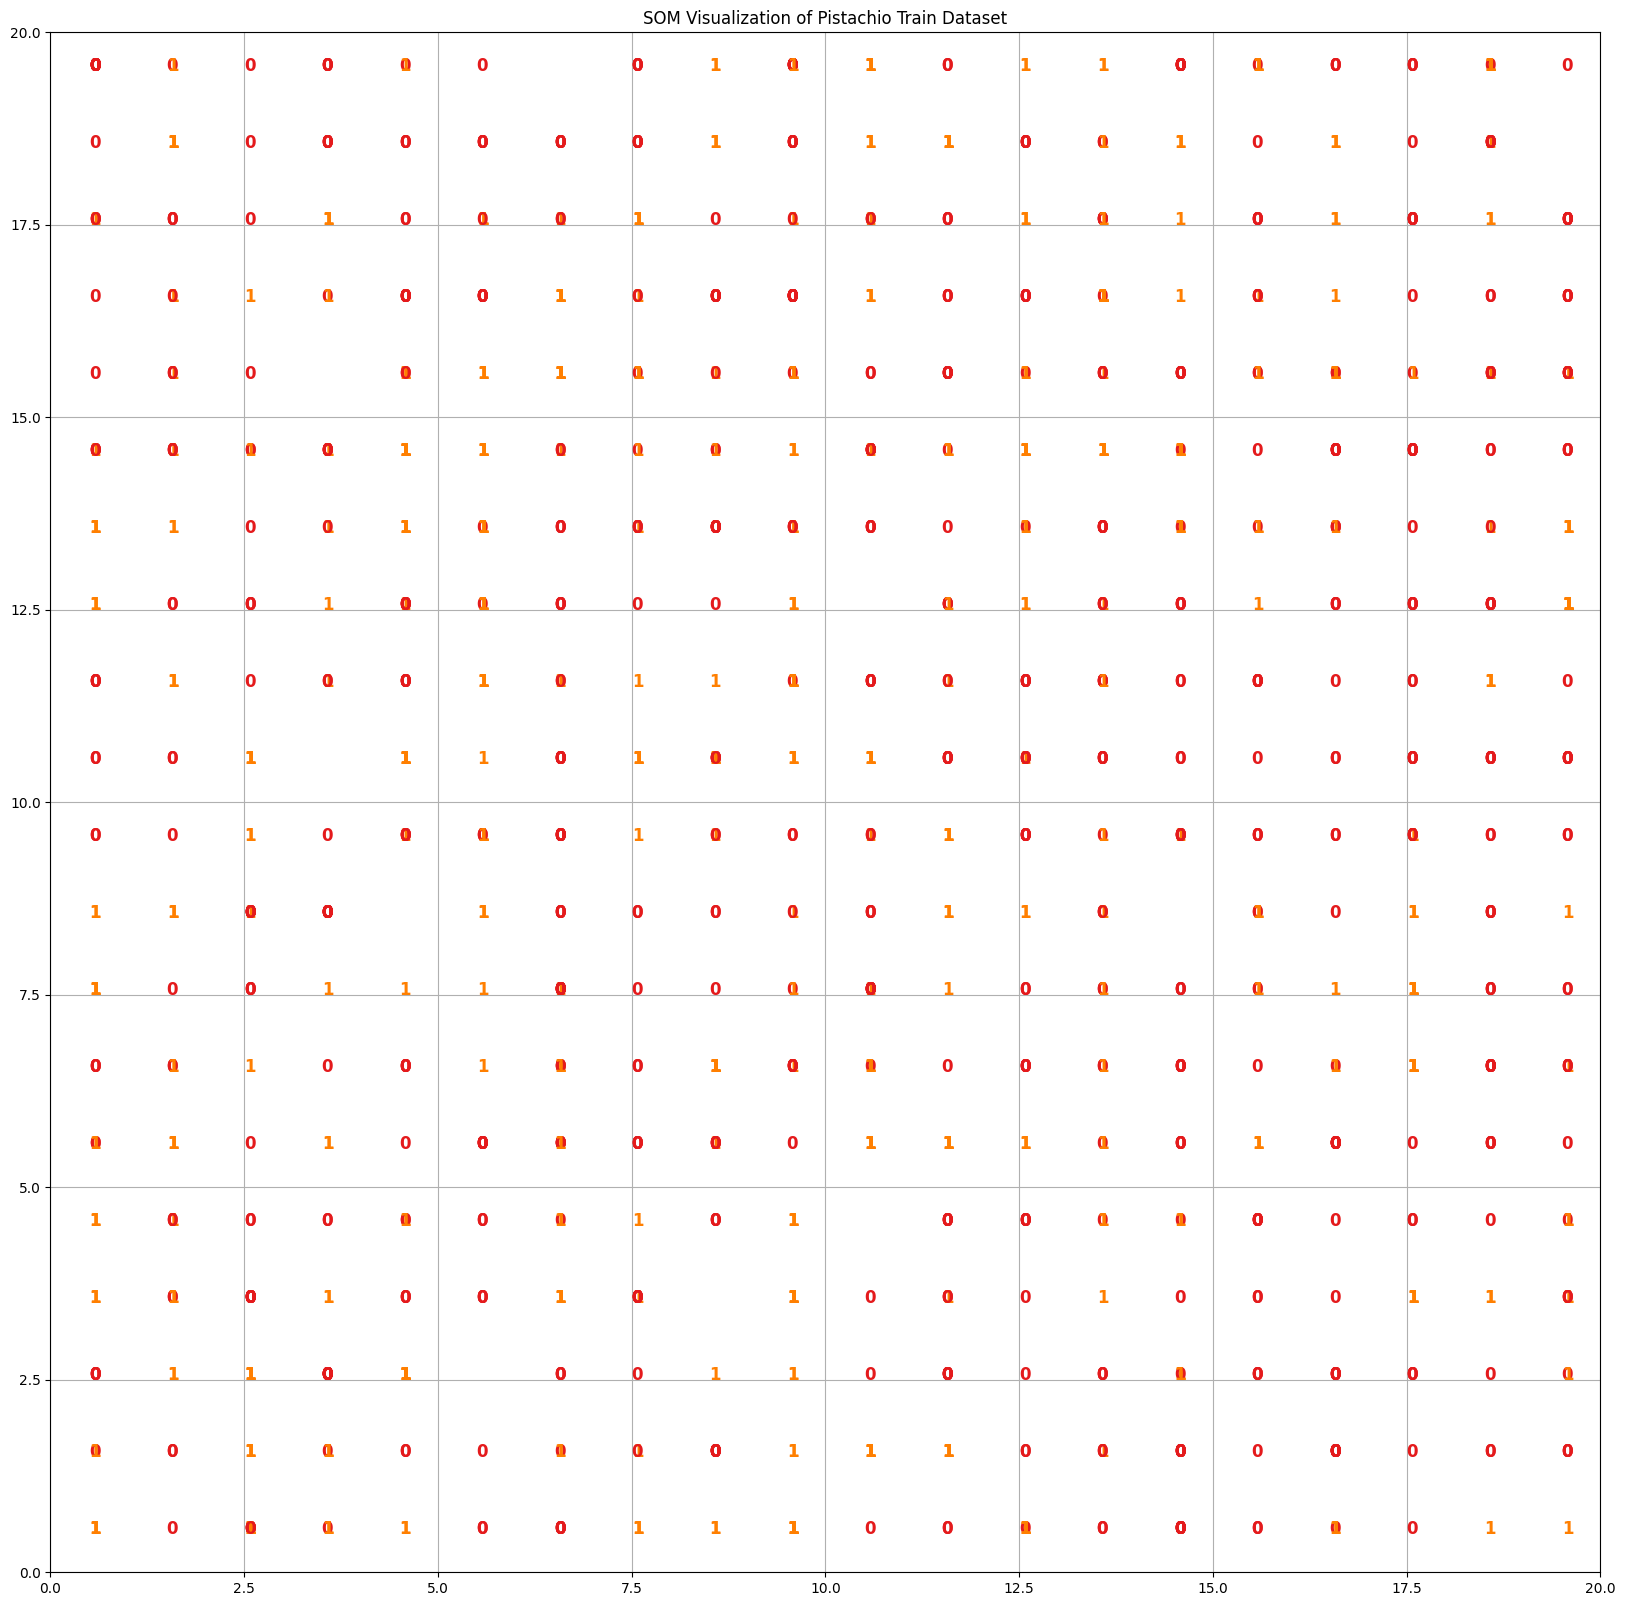

In [23]:
# Visualize the results
plt.figure(figsize=(20, 20))
for i, x in enumerate(X_train):
    w = som.winner(x)
    plt.text(w[0] + 0.5, w[1] + 0.5, str(y_train[i]),
             color=plt.cm.Set1(y_train[i] / 2.), fontdict={'weight': 'bold', 'size': 12})
plt.xlim([0, 20])
plt.ylim([0, 20])
plt.grid()
plt.title("SOM Visualization of Pistachio Train Dataset")
plt.show()
#som.winner(x) – What it does:
#Given an input vector x, this function finds the 
# Best Matching Unit (BMU) on the Self-Organizing Map.
#The BMU is the neuron whose weight vector is closest 
# (usually using Euclidean distance) to the input vector x.

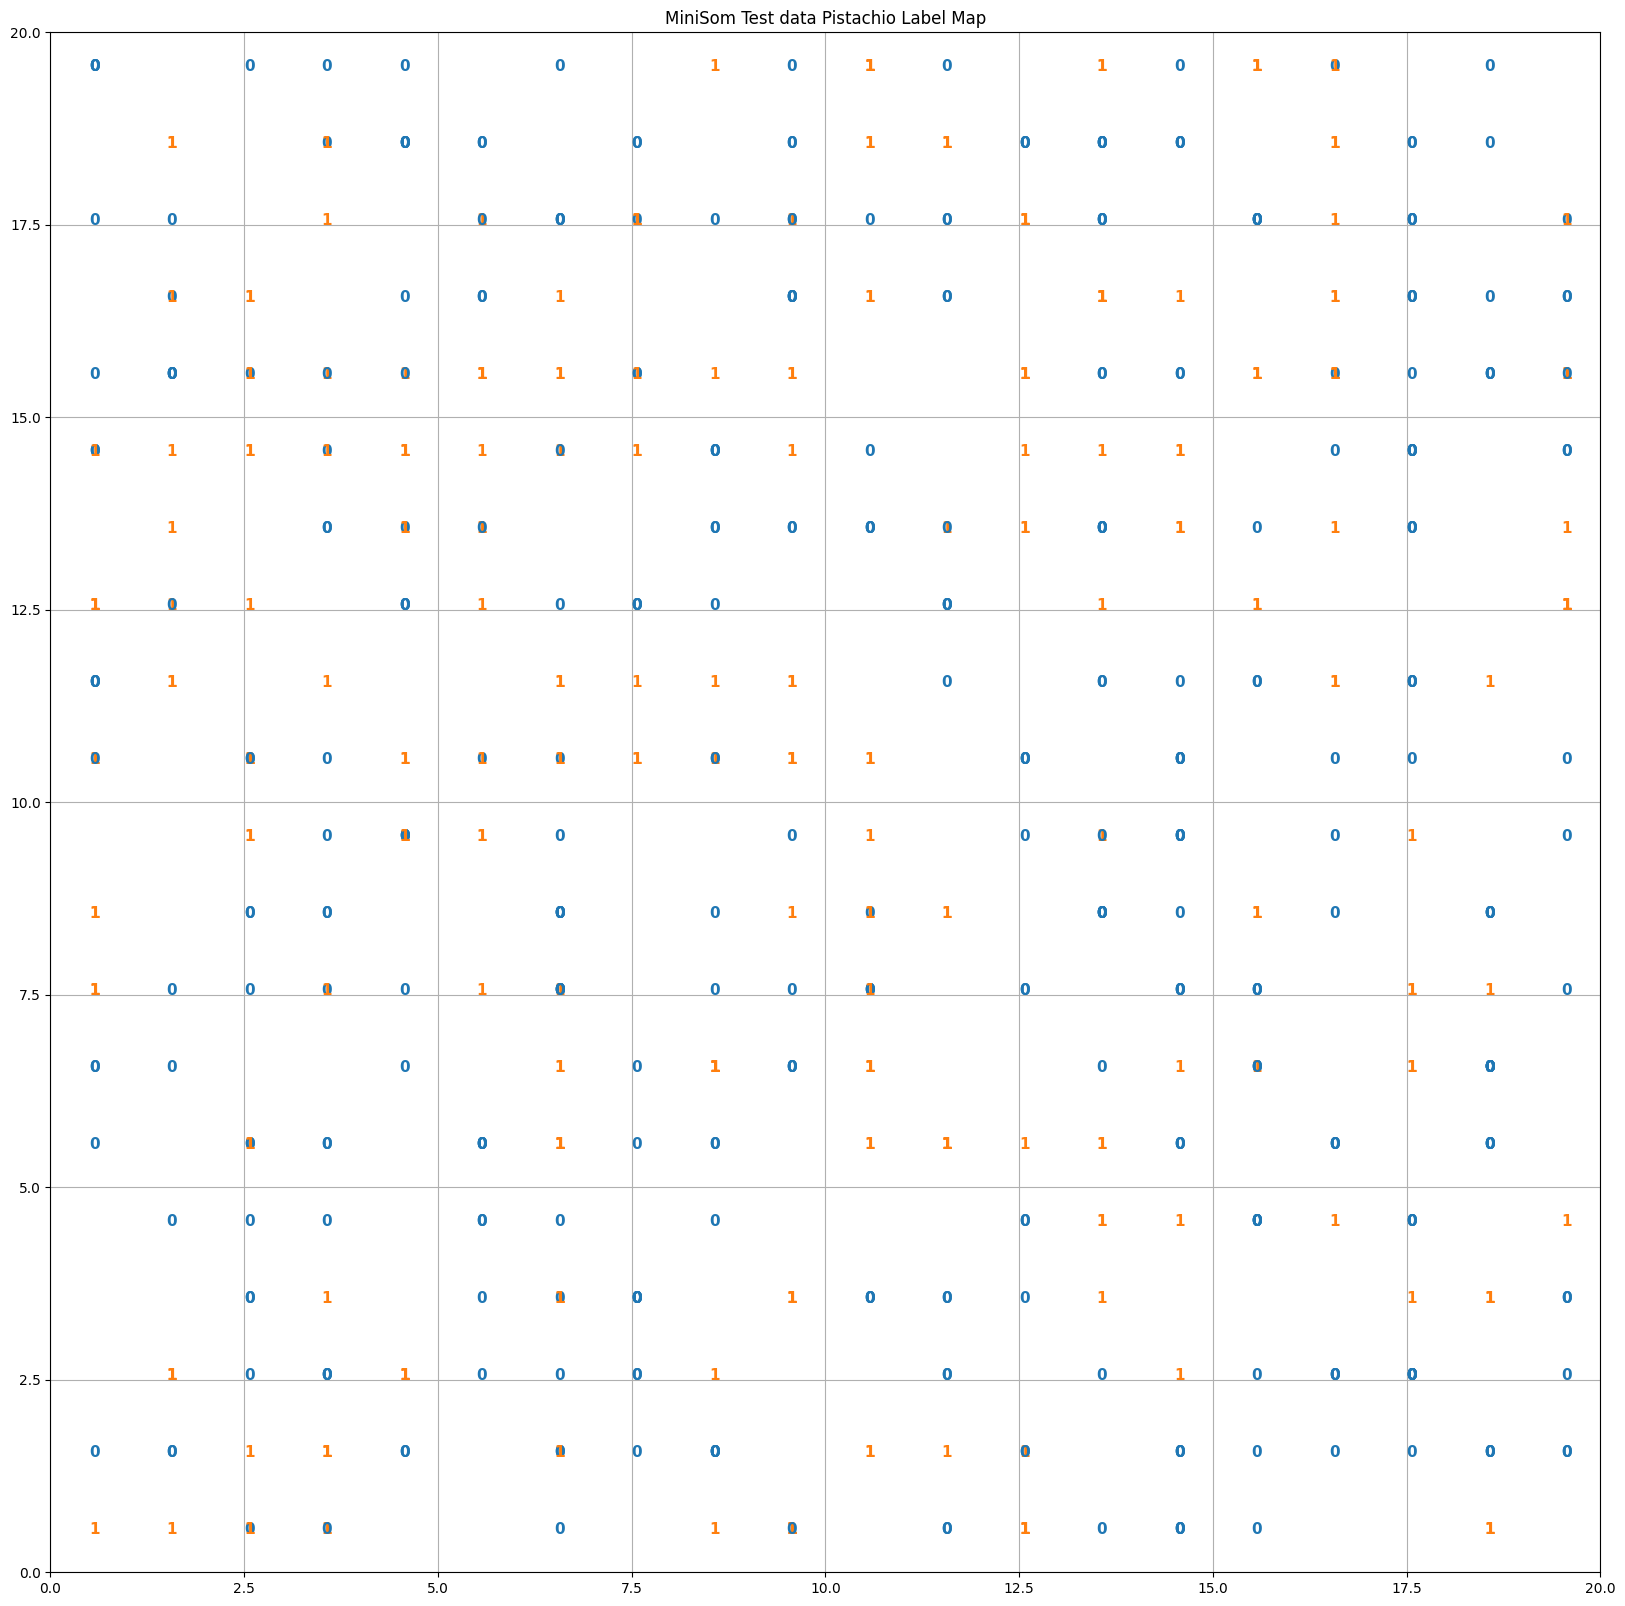

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for i, x in enumerate(X_test):
    w = som.winner(x)
    plt.text(w[0]+0.5, w[1]+0.5, str(y_test[i]),
             color=plt.cm.tab10(y_test[i]),
             fontdict={'weight': 'bold', 'size': 11})
plt.xlim([0, 20])
plt.ylim([0, 20])
plt.title("MiniSom Test data Pistachio Label Map")
plt.grid()
plt.show()


In [20]:
w

(3, 7)